4.7

Design a six element, broadside Dolph-Chebyshev array for a sidelobe level of -20dB

(a) give the relative excitation currents for the array elements

(b) for elements spaced a half wavelength apart, what is the null-to-null width of the main beam

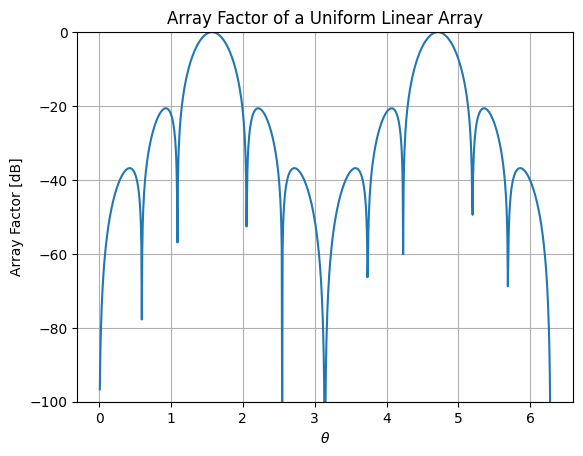

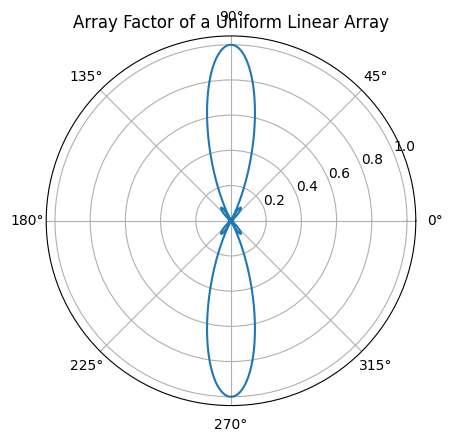

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def weighted_currents(b, theta, N, f, alpha):
    # signal parameters
    lam = 3e8 / f
    k = 2 * np.pi / lam

    # array parameters
    d = lam / 2
    n = np.arange(1, N + 1)

    # calculate Chebyshev-Dolf equation
    u = k * d * np.cos(theta) - alpha
    x = b * np.cos(u / 2)  # No clipping needed

    T = np.zeros((N, len(theta)), dtype=complex)
    for i in range(N):
        T[i] = np.cos(n[i] * np.arccos(x.astype(complex)))  

    return T

# Parameters
b = 1.16
theta = np.linspace(0.01, 2 * np.pi, 1000)
N_el = 6
N = N_el - 1
f = 1e9
alpha = 0

# Calculate weighted currents
weights = weighted_currents(b, theta, N, f, alpha)
AF = np.sum(weights, axis=0)

# Rectangular plot
plt.plot(theta, 20 * np.log10(np.abs(AF) / np.max(np.abs(AF))))
plt.xlabel(r'$\theta$')
plt.ylabel('Array Factor [dB]')
plt.title('Array Factor of a Uniform Linear Array')
plt.ylim([-100, 0])
plt.grid()
plt.show()

# Polar plot
plt.polar(theta, np.abs(AF) / np.max(np.abs(AF)))
plt.title('Array Factor of a Uniform Linear Array')
plt.show()


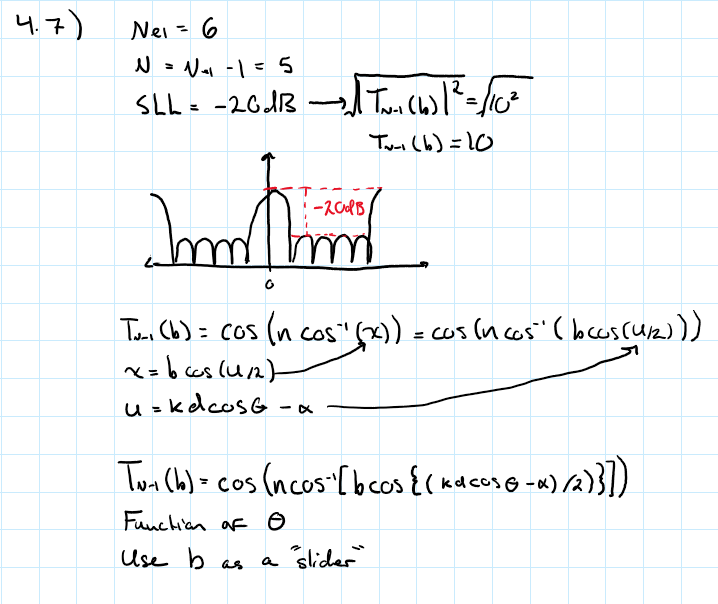

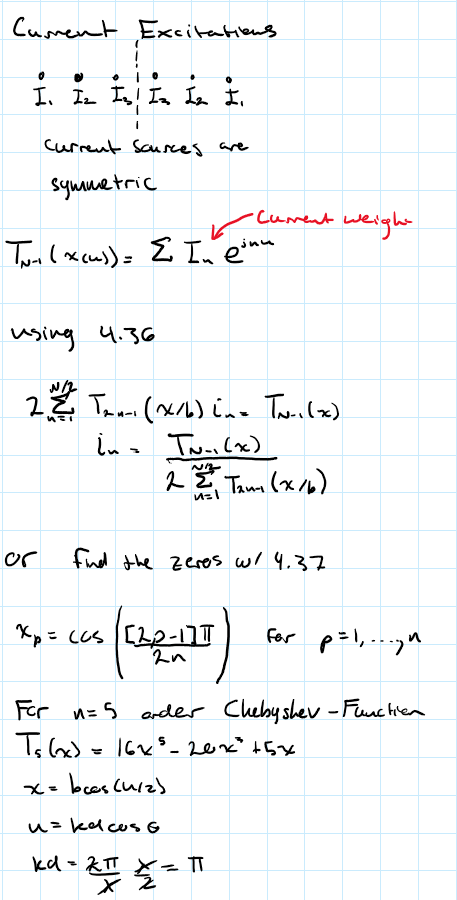

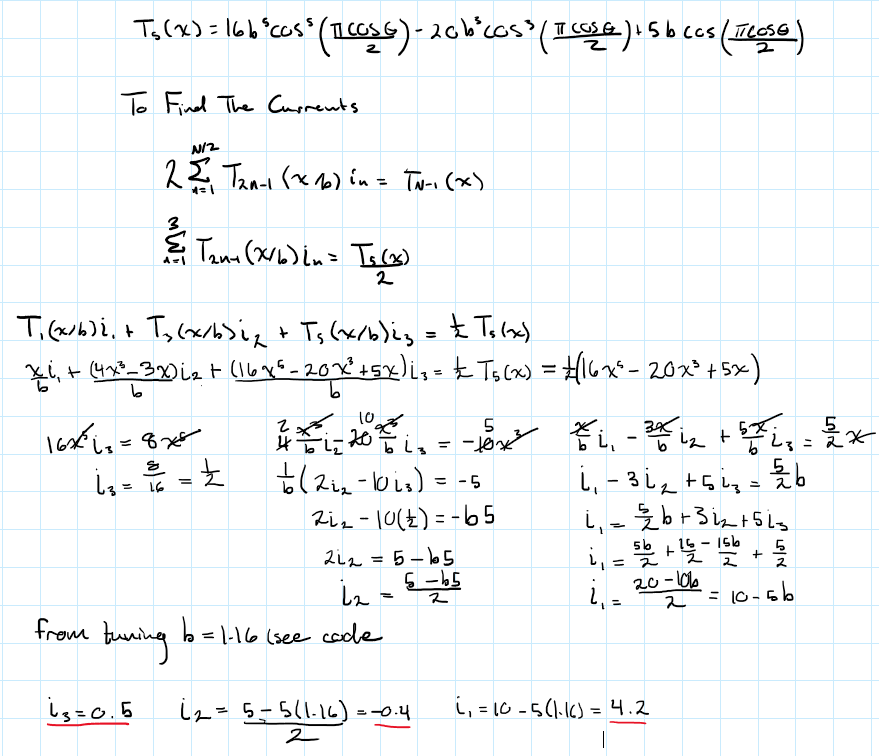

In [4]:
# import the images of the math to solve for the current weights

from IPython.display import Image
from IPython.core.display import HTML 

display(Image("11-a-work.png", width=500, height=500))
display(Image("11-a-work-2.png", width=500, height=500))
display(Image("11-a-work-3.png", width=500, height=500))

In [7]:
# b Calculate the first null then double to get null to null beamwidth of the main beam
lam = 3e8/f
d = lam/2
k = 2*np.pi/lam
x1 = np.cos(np.pi/(2*(N-1)))
theta_1 = np.arccos((2/(k*d))*np.arccos(x1/b))
print(f"First null at {np.degrees(theta_1)} degrees")
print(f"Null to null beamwidth of {2*(90-np.degrees(theta_1))} degrees")

First null at 65.58016216886725 degrees
Null to null beamwidth of 48.839675662265506 degrees


7.4 

Use an optimization algorithm to create a six element broadside array with real symmetric excitations to achieve minimum sidelobe levels.